<a href="https://colab.research.google.com/github/victorsantanaa/imersaoDadosAlura/blob/main/Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aula 2 Imersão de Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
 
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
 
dados = pd.read_csv(fonte)

In [ ]:
dados.query("NU_IDADE<=14")["SG_UF_RESIDENCIA"].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
PB     7
PI     7
GO     7
DF     4
MT     4
AM     4
TO     3
SE     3
PR     3
RO     2
AL     2
SC     2
RS     1
RN     1
ES     1
MS     1
AP     1
AC     1
RJ     1
Name: SG_UF_RESIDENCIA, dtype: int64

###Desafio Extra
Quem faz a prova no estado diferente do que vive? E quais as condições de tais pessoas?

In [ ]:
interesse = ["NU_IDADE", "SG_UF_PROVA", "SG_UF_RESIDENCIA", "Q006", "TP_COR_RACA"]

dados.query("SG_UF_PROVA != SG_UF_RESIDENCIA")[interesse].value_counts()


NU_IDADE  SG_UF_PROVA  SG_UF_RESIDENCIA  Q006  TP_COR_RACA
17        PE           PB                B     3              9
          SE           BA                B     3              6
18        SE           BA                B     3              6
          PE           AL                B     3              5
          SE           BA                B     2              4
                                                             ..
22        MG           SP                J     3              1
                                         H     1              1
                                         G     1              1
                       RJ                F     1              1
14        MA           TO                B     3              1
Length: 1128, dtype: int64

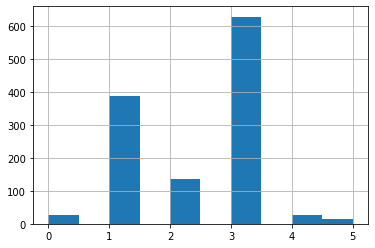

In [ ]:
dados.query("SG_UF_PROVA != SG_UF_RESIDENCIA")["TP_COR_RACA"].hist()


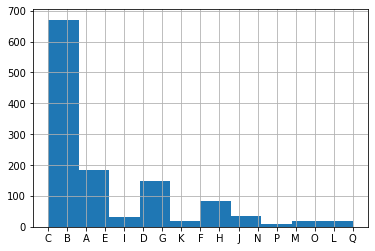

In [ ]:
dados.query("SG_UF_PROVA != SG_UF_RESIDENCIA")["Q006"].hist()

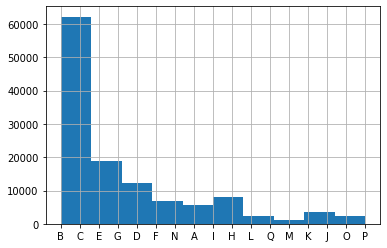

In [ ]:
dados.query("SG_UF_PROVA != SG_UF_RESIDENCIA" and "TP_COR_RACA >= 2" and "TP_COR_RACA<=3")["Q006"].hist()

###Continuação Aula 2 Imersão de Dados

In [ ]:
dados.query("NU_IDADE<=14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)*100

PE    12.413793
CE    10.344828
BA     9.655172
PA     8.275862
MG     7.586207
SP     7.586207
MA     6.206897
PB     4.827586
PI     4.827586
GO     4.827586
DF     2.758621
MT     2.758621
AM     2.758621
TO     2.068966
SE     2.068966
PR     2.068966
RO     1.379310
AL     1.379310
SC     1.379310
RS     0.689655
RN     0.689655
ES     0.689655
MS     0.689655
AP     0.689655
AC     0.689655
RJ     0.689655
Name: SG_UF_RESIDENCIA, dtype: float64

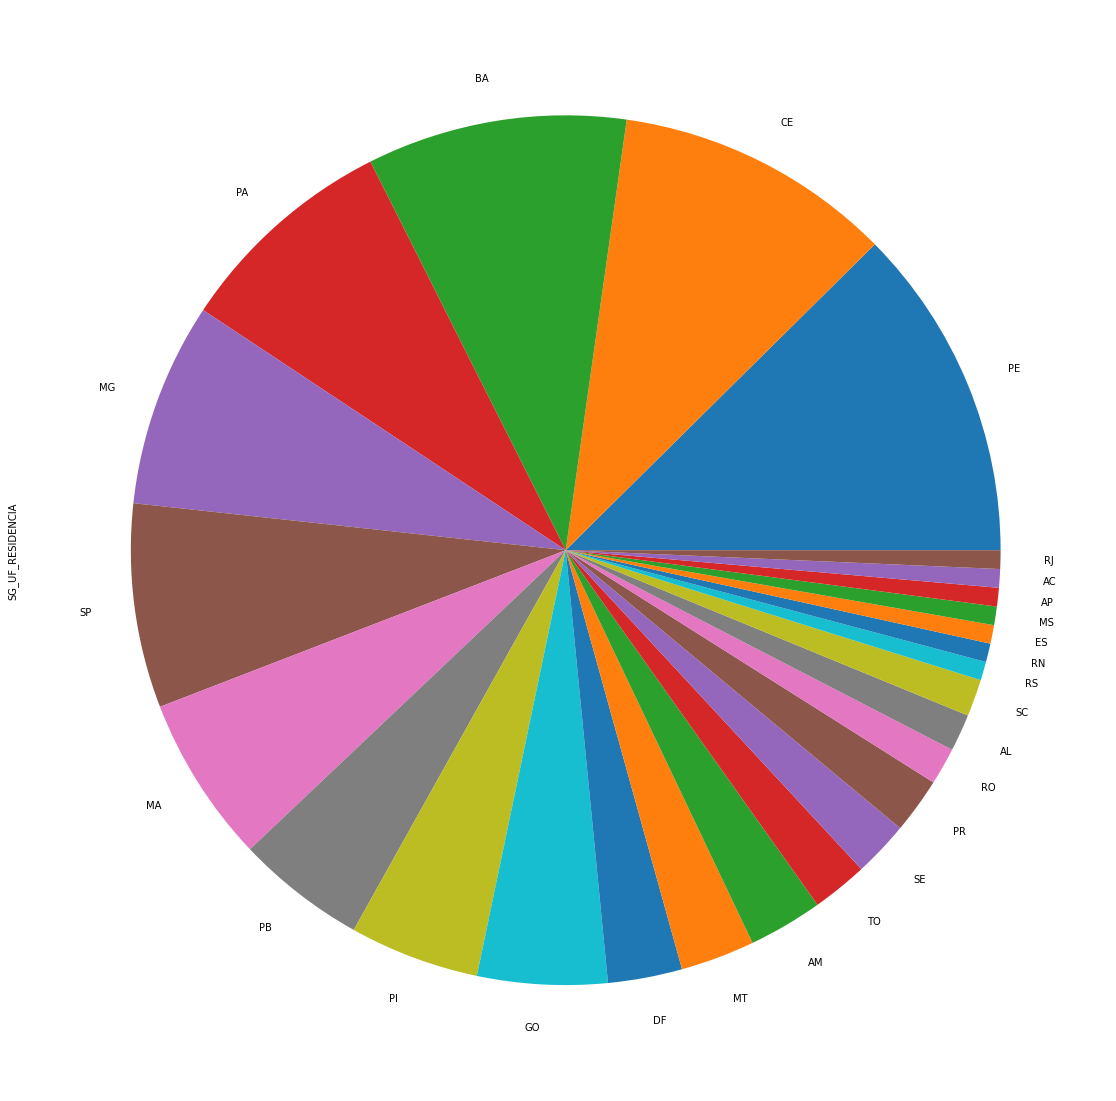

In [ ]:
alunos_menor_quatorze = dados.query("NU_IDADE<=14")
alunos_menor_quatorze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize = (20,20))

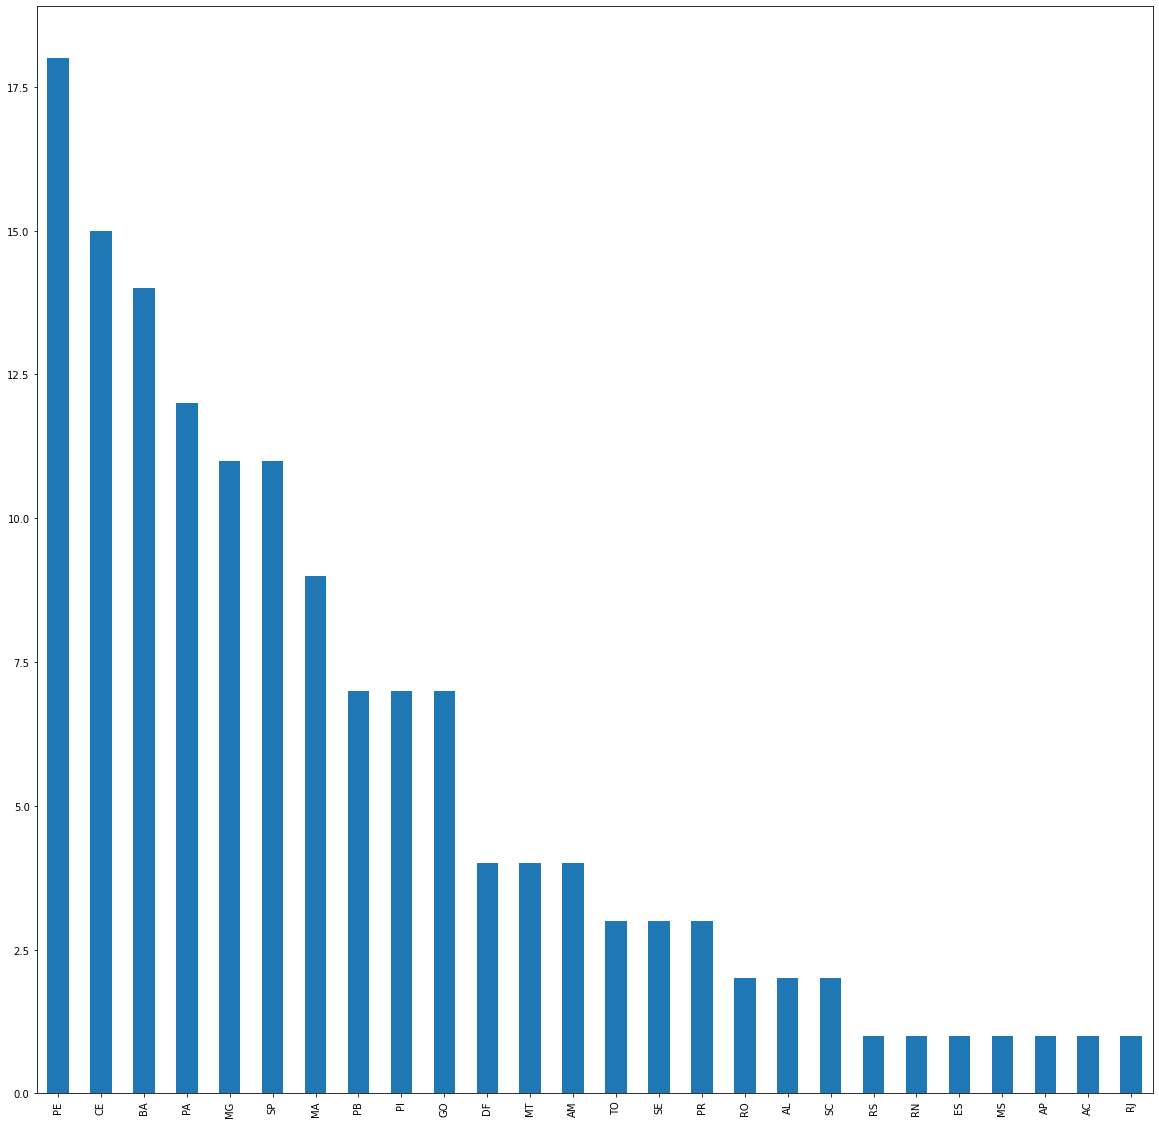

In [ ]:
alunos_menor_quatorze["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize = (20,20))

Text(0.5, 1.0, 'Boxplot de notas de matemática pela renda')

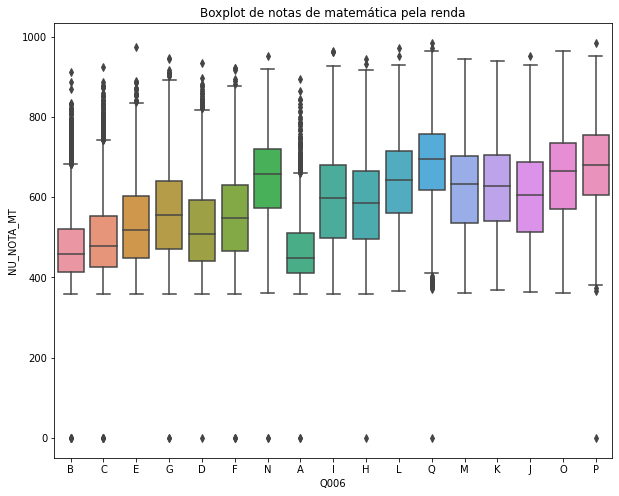

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y= "NU_NOTA_MT", data= dados)
plt.title("Boxplot de notas de matemática pela renda")

Text(0.5, 1.0, 'Boxplot de notas de matemática pela renda')

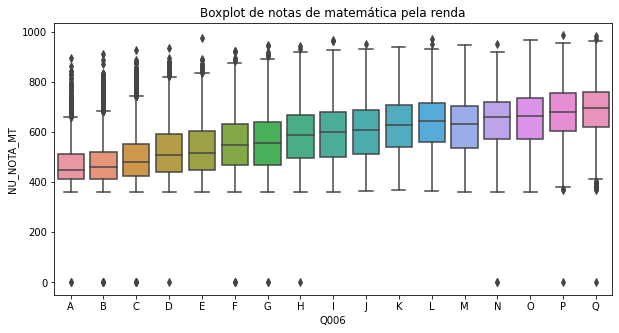

In [ ]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

plt.figure(figsize=(10,5))
sns.boxplot(x="Q006", y= "NU_NOTA_MT", data= dados, order = renda_ordenada)
plt.title("Boxplot de notas de matemática pela renda")

In [ ]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)


In [ ]:
def plotBoxPlotSns(dados):
  plt.figure(figsize=(10,5))
  sns.boxplot(x="Q006", y= "NU_NOTA_TOTAL", data= dados, order = renda_ordenada)
  plt.title("Boxplot pela renda")

Text(0.5, 1.0, 'Boxplot de nota Total pela renda')

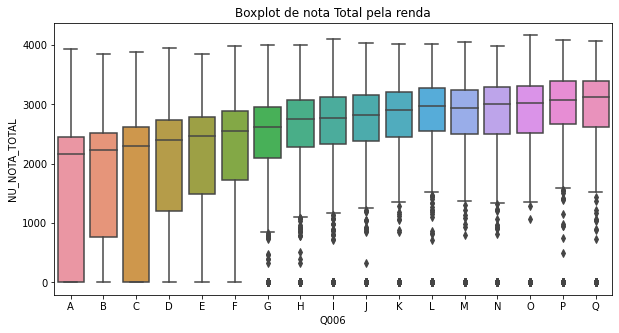

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Q006", y= "NU_NOTA_TOTAL", data= dados, order = renda_ordenada)
plt.title("Boxplot de nota Total pela renda")

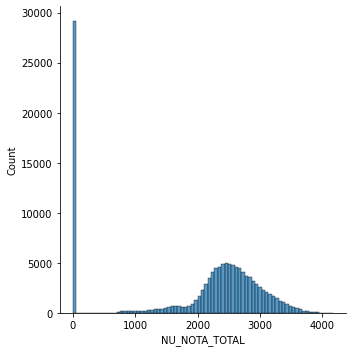

In [ ]:
sns.displot(dados, x="NU_NOTA_TOTAL")

In [ ]:
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

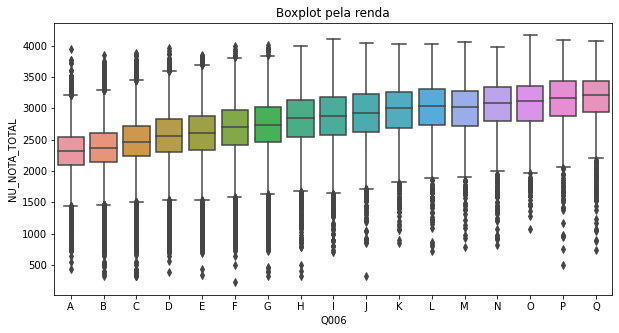

In [ ]:
plotBoxPlotSns(dados_sem_notas_zero)

Text(0.5, 1.0, 'Boxplot de nota Total pela renda')

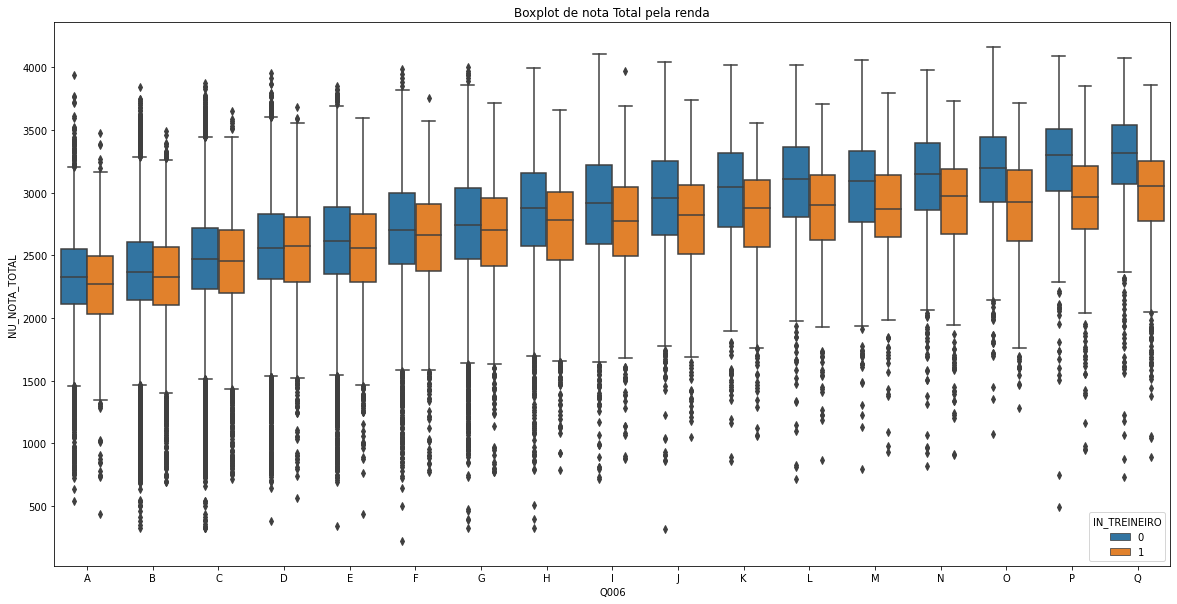

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Q006", y= "NU_NOTA_TOTAL", data= dados_sem_notas_zero, order = renda_ordenada,
            hue = "IN_TREINEIRO")
plt.title("Boxplot de nota Total pela renda")